## Dependencias

In [1]:
!pip install giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.4 MB/s 
     |████████████████████████████████| 3.2 MB 40.4 MB/s 
     |████████████████████████████████| 458 kB 54.1 MB/s 
     |████████████████████████████████| 529 kB 44.3 MB/s 
     |████████████████████████████████| 1.6 MB 42.2 MB/s 


In [2]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.7 MB 1.2 MB/s 


In [3]:
import pandas as pd
import numpy as np
import numpy as np
import gudhi as gd  
from sklearn import manifold
from pylab import *
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
from gtda.time_series import SingleTakensEmbedding
from gtda.homology import VietorisRipsPersistence
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
%matplotlib inline
# import sklearn_tda


### Importar datos

In [4]:
object=pd.read_pickle('uke_eggedal_data_challenge.pkl')
df=pd.DataFrame.from_dict(object,orient='index')

In [5]:
df=df.T
df

,flow,obs_tas,flow_dates,obs_lon_lat,obs_pr,obs_dates
0,1.723781,"[-10.600000381469727, -9.699999809265137, -6.6...",1958-01-04,9.37,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000...",1957-01-01
1,0.960882,"[-20.5, -19.100000381469727, -12.0, -17.700000...",1958-01-05,60.23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000...",1957-01-02
2,0.001,"[-23.600000381469727, -22.5, -15.1000003814697...",1958-01-06,None,"[0.10000000149011612, 0.0, 0.30000001192092896...",1957-01-03
3,0.001,"[-16.200000762939453, -16.0, -14.1000003814697...",1958-01-07,None,"[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976...",1957-01-04
4,0.316796,"[-7.900000095367432, -7.800000190734863, -9.5,...",1958-01-08,None,"[9.300000190734863, 8.600000381469727, 8.0, 8....",1957-01-05
...,...,...,...,...,...,...
21541,1.812796,"[-12.5, -11.699999809265137, -8.60000038146972...",2016-12-26,None,"[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27
21542,None,"[-12.5, -11.899999618530273, -9.10000038146972...",NaT,None,"[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28
21543,None,"[-11.899999618530273, -11.399999618530273, -8....",NaT,None,"[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29
21544,None,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...",NaT,None,"[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30


### Hay un desface en la data, se separan en df_target y df predic, se usa merge con date como llave

In [6]:
df_target=df[['flow_dates','flow']]
df_target.sort_values(by='flow_dates')
df_target=df_target.dropna()
df_target

,flow_dates,flow
0,1958-01-04,1.723781
1,1958-01-05,0.960882
2,1958-01-06,0.001
3,1958-01-07,0.001
4,1958-01-08,0.316796
...,...,...
21537,2016-12-22,4.84329
21538,2016-12-23,3.75697
21539,2016-12-24,3.556818
21540,2016-12-25,3.402133


In [7]:
df_predic=df[['obs_dates','obs_tas','obs_pr']]
df_predic.sort_values(by='obs_dates')
df_predic=df_predic.dropna()
df_predic


,obs_dates,obs_tas,obs_pr
0,1957-01-01,"[-10.600000381469727, -9.699999809265137, -6.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000..."
1,1957-01-02,"[-20.5, -19.100000381469727, -12.0, -17.700000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000..."
2,1957-01-03,"[-23.600000381469727, -22.5, -15.1000003814697...","[0.10000000149011612, 0.0, 0.30000001192092896..."
3,1957-01-04,"[-16.200000762939453, -16.0, -14.1000003814697...","[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976..."
4,1957-01-05,"[-7.900000095367432, -7.800000190734863, -9.5,...","[9.300000190734863, 8.600000381469727, 8.0, 8...."
...,...,...,...
21541,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100..."
21542,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6...."
21543,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099..."
21544,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5...."


### Se hace el merge tomando como llaves las fechas, el resultado es un df con fechas que ya hacen match

In [8]:
df_final=df_predic.merge(df_target,how='inner',left_on='obs_dates',right_on='flow_dates')
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796
...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777


### Climate AI sugiere usar o PCA o simplemente promediar los datos vectorizados en lugar de tratarlos como variables distintas

In [9]:
df_final['temperatures'] = df_final['obs_tas'].apply(lambda x: np.mean(x))
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow,temperatures
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781,-12.655556
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882,-7.722222
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001,-8.088889
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001,-10.122222
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796,-17.455555
...,...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704,-9.944444
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625,-10.288889
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884,-9.411111
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777,-5.055556


In [10]:
df_final['precipitations'] = df_final['obs_pr'].apply(lambda x: np.mean(x))
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow,temperatures,precipitations
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781,-12.655556,0.000000
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882,-7.722222,2.588889
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001,-8.088889,12.766667
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001,-10.122222,6.877778
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796,-17.455555,3.411111
...,...,...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704,-9.944444,0.555556
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625,-10.288889,4.888889
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884,-9.411111,1.277778
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777,-5.055556,3.444444


## TDA datos sin suavizar

In [11]:
max_embedding_dimension = 50
max_time_delay = 30
stride = 7

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)


In [12]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)
    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )
    return embedder.dimension,embedder.time_delay_,y_embedded

In [13]:
len(df_final)

21178

In [14]:
21178%8

2

Dividir los datos en 8 subperiodos de misma longitud, y analizar los cambios en la homologia a traves del tiempo. Para tener consistencia en los datos, se usaran las mismas dimensiones de encaje que las que se encuentren como optimas para todo el conjunto de datos

In [15]:
periods=[]
for i in range(8):
  periods.append(df_final.iloc[int(i*21176/8)+1:int((i+1)*21176/8)])

In [16]:
for i in periods:
  print(len(i))

2646
2646
2646
2646
2646
2646
2646
2646


In [17]:
x1,y1,_ = fit_embedder(embedder_periodic, df_final['precipitations'])
x2,y2,_ = fit_embedder(embedder_periodic, df_final['temperatures'])
x3,y3,_ = fit_embedder(embedder_periodic, df_final['flow'].astype('float32'))


Shape of embedded time series: (2972, 15)
Optimal embedding dimension is 15 and time delay is 27
Shape of embedded time series: (2992, 9)
Optimal embedding dimension is 9 and time delay is 30
Shape of embedded time series: (2974, 13)
Optimal embedding dimension is 13 and time delay is 30


In [18]:
embedder_Precs = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=y1,
    dimension=x1,
    stride=stride,
)
embedder_Temps = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=y2,
    dimension=x2,
    stride=stride,
)
embedder_Flows = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=y3,
    dimension=x3,
    stride=stride,
)

### Funciones auxiliares

In [19]:
def tank(dfs: list) -> list:
  pca2 = PCA(n_components=2)
  pca3 = PCA(n_components=3)
  precs3d,precs2d,temps3d,temps2d,flows3d,flows2d=[],[],[],[],[],[]
  for i in range(len(dfs)):
    _,_,precipitacion_embedded = fit_embedder(embedder_Precs, dfs[i]['precipitations'],False)
    precs3d.append(pca3.fit_transform(precipitacion_embedded))
    precs2d.append(pca2.fit_transform(precipitacion_embedded))
    _,_,temperatures_embedded = fit_embedder(embedder_Temps, dfs[i]['temperatures'],False)
    temps3d.append(pca3.fit_transform(temperatures_embedded))
    temps2d.append(pca2.fit_transform(temperatures_embedded))
    _,_,flow_embedded = fit_embedder(embedder_Flows, dfs[i]['flow'],False)
    flows3d.append(pca3.fit_transform(flow_embedded))
    flows2d.append(pca2.fit_transform(flow_embedded))
  return precs3d,precs2d,temps3d,temps2d,flows3d,flows2d


In [20]:
precs3d,precs2d,temps3d,temps2d,flows3d,flows2d=tank(periods)

In [21]:
def die2dPlotterZeug(x:set,title:str)-> None:
  plt.figure(figsize=(30, 15))
  for i in range(len(x)):
    plt.subplot(2, 4, i+1)
    plt.scatter(x[i][:,0],x[i][:,1])
    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')
    print("Respectivos maximos:")
    print(max(x[i][:,0]),max(x[i][:,1]))
    plt.title('Periodo '+str(i+1)+' de '+title)


### Encajes bidimensionales de datos crudos

Respectivos maximos:
32.14938471221232 26.97437745018238
Respectivos maximos:
23.723306855307094 28.859845463422726
Respectivos maximos:
24.419461991752506 16.38529198110242
Respectivos maximos:
25.618847109794313 27.716721652942034
Respectivos maximos:
22.966611852731205 17.92732843370527
Respectivos maximos:
72.52280675961926 39.85194327204828
Respectivos maximos:
28.88867002931236 38.931335544242096
Respectivos maximos:
27.65495285690265 37.25357608810602


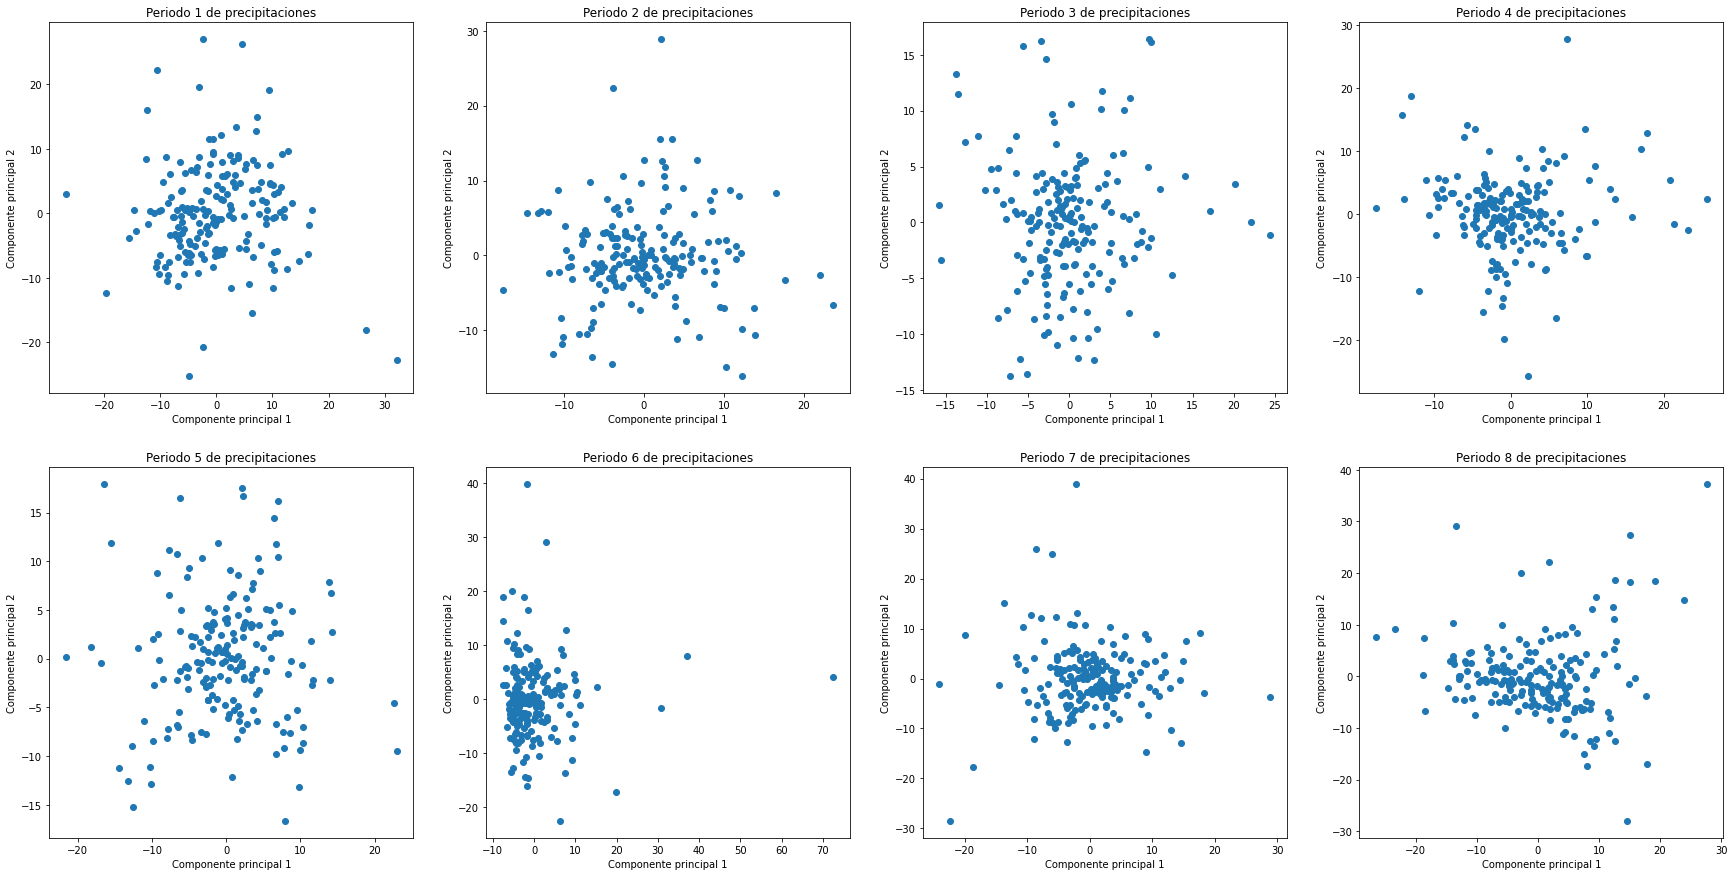

In [22]:
die2dPlotterZeug(precs2d,'precipitaciones')

Respectivos maximos:
62.42571728330229 60.33328746339148
Respectivos maximos:
68.79917337432065 69.84620883381614
Respectivos maximos:
62.41007841744732 60.31172468796334
Respectivos maximos:
67.69833532591295 62.7688455093971
Respectivos maximos:
53.48956921153393 52.13571375952584
Respectivos maximos:
62.74081320875355 58.68891397338455
Respectivos maximos:
62.43868573908604 60.500589922615
Respectivos maximos:
62.99387605345018 59.53878031643668


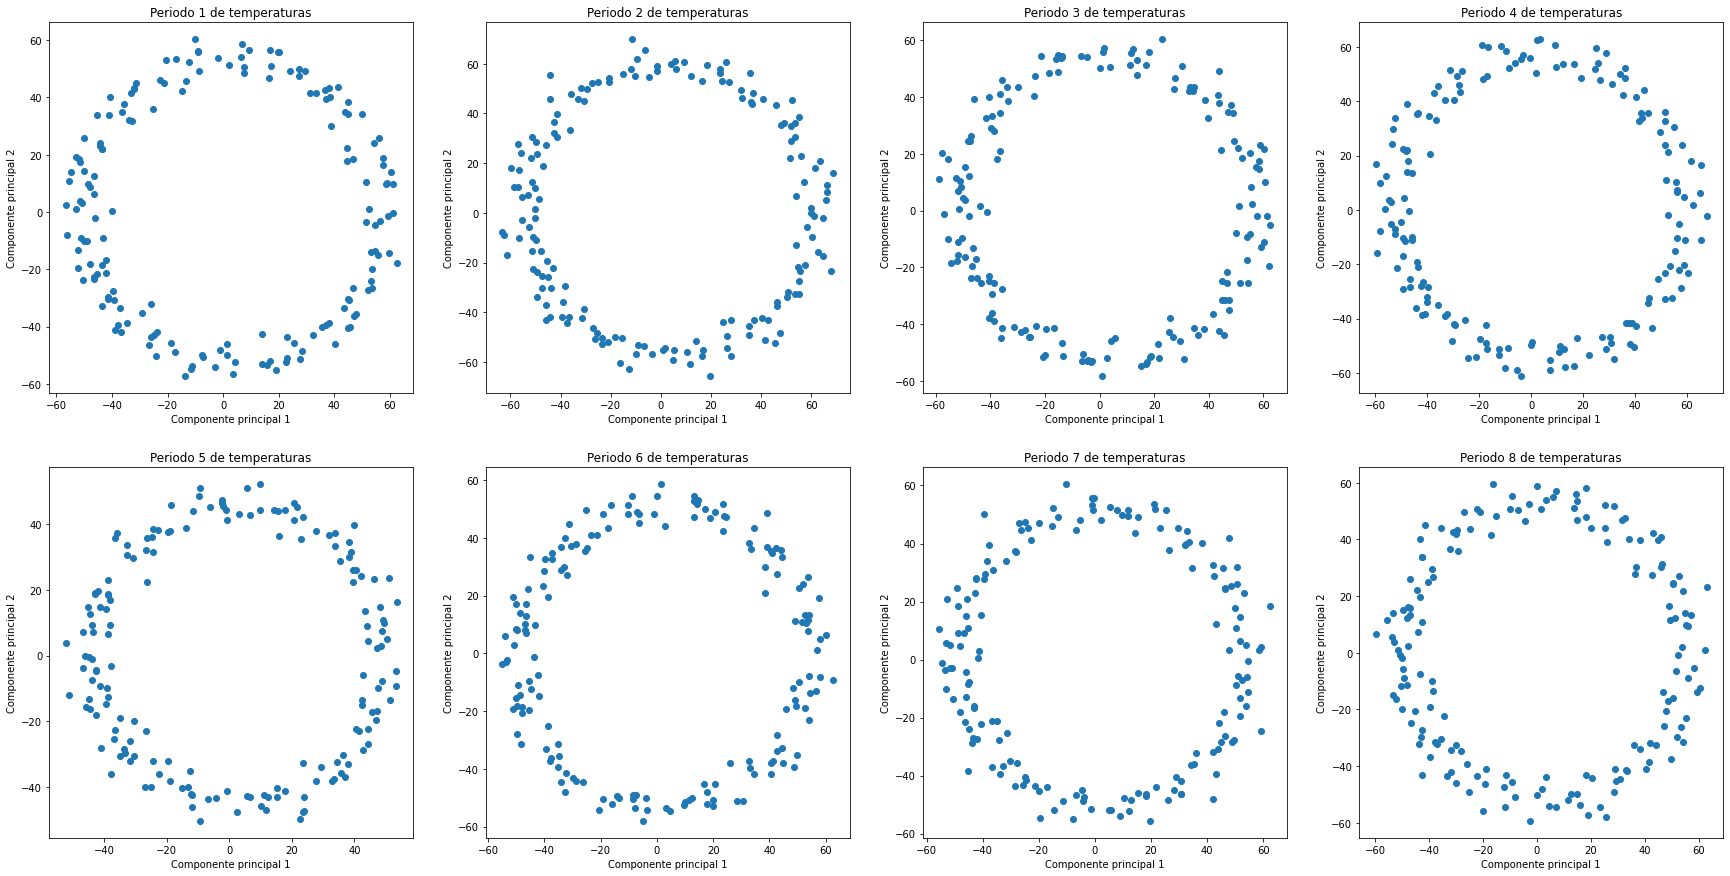

In [23]:
die2dPlotterZeug(temps2d,'temperaturas')

Respectivos maximos:
46.72074438743751 48.004484080852116
Respectivos maximos:
51.44629105951579 43.512572588487885
Respectivos maximos:
52.532082717208574 48.81052064751267
Respectivos maximos:
44.35485222431153 49.42365449553309
Respectivos maximos:
42.817952366557044 36.65232670998736
Respectivos maximos:
53.01422147451268 43.514068303934955
Respectivos maximos:
48.43901384949682 47.99455112656533
Respectivos maximos:
45.150255870091804 45.638762237889686


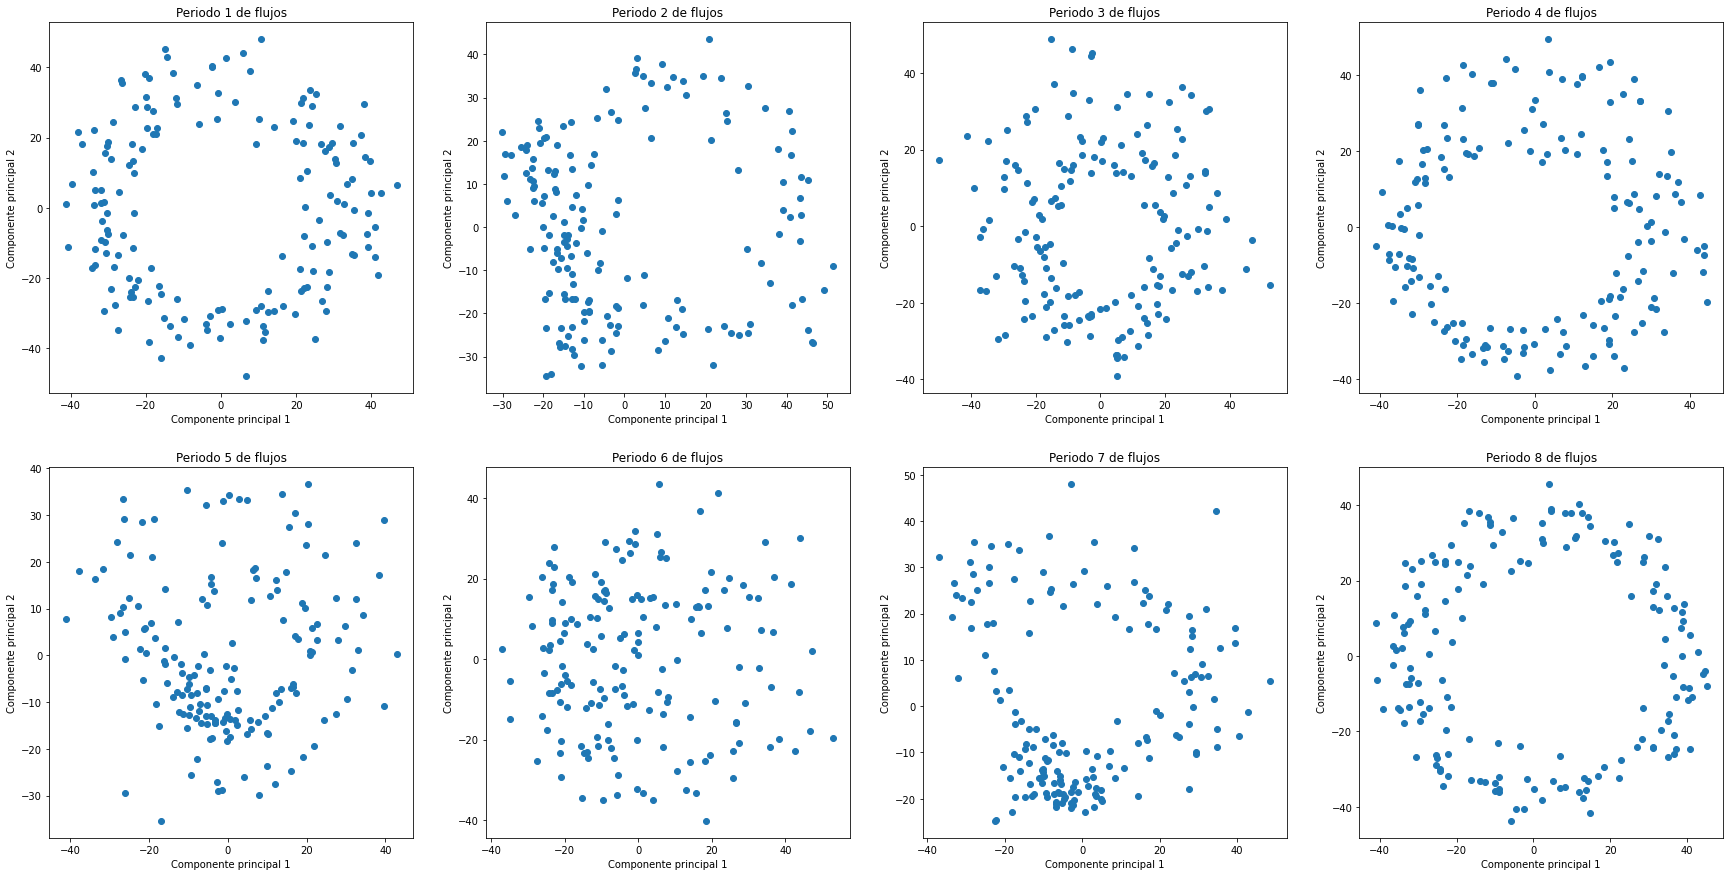

In [24]:
die2dPlotterZeug(flows2d,'flujos')

### Encajes tridimensionales de datos crudos

In [25]:
def die3dPlotterZeug(x:set,title:str)-> None:
  plt.figure(figsize=(30, 15))
  for i in range(len(x)):
    plt.subplot(2, 4, i+1,projection='3d')
    plt.scatter(x[i][:,0],x[i][:,1],x[i][:,2])
    print("Respectivos maximos:")
    print(max(x[i][:,0]),max(x[i][:,1]),max(x[i][:,2]))
    plt.title('Periodo '+str(i+1)+' de '+title)

    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')




/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Respectivos maximos:
32.14938471221232 26.97437745018238 32.751576452414895
Respectivos maximos:
23.723306855307094 28.859845463422726 21.767476458729252
Respectivos maximos:
24.419461991752506 16.38529198110242 29.380515600941603
Respectivos maximos:
25.618847109794313 27.716721652942034 24.05709880378769
Respectivos maximos:
22.966611852731205 17.92732843370527 33.43317138323384
Respectivos maximos:
72.52280675961926 39.85194327204828 30.097099954788444
Respectivos maximos:
28.88867002931236 38.931335544242096 24.634045114304442
Respectivos maximos:
27.65495285690265 37.25357608810602 29.59493562945363


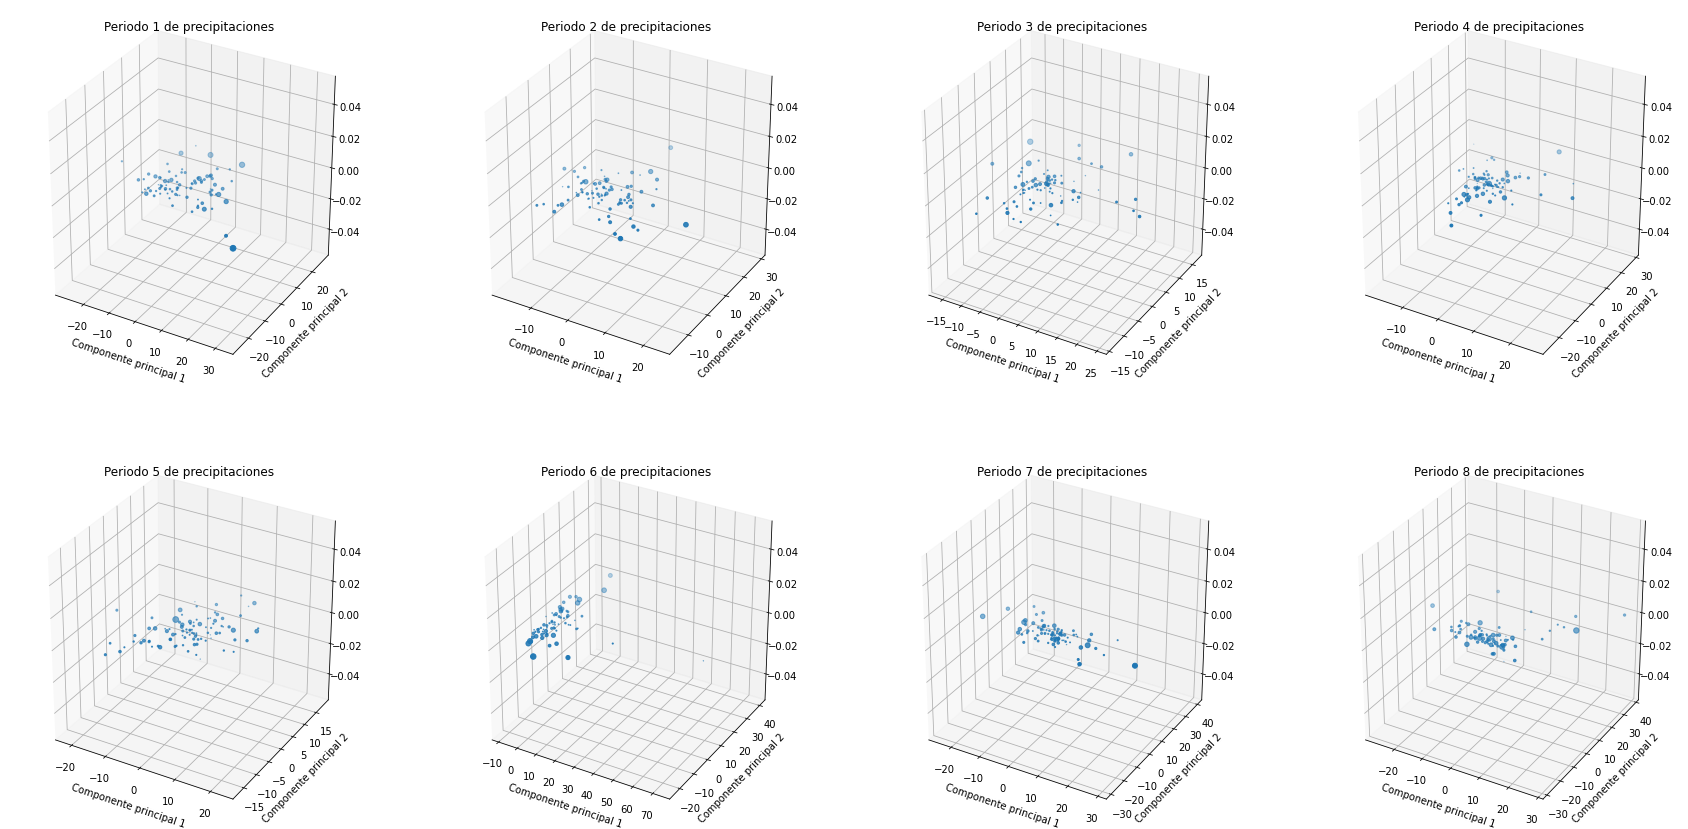

In [26]:
die3dPlotterZeug(precs3d,'precipitaciones')

Respectivos maximos:
62.42571728330229 60.33328746339148 17.004521311485842
Respectivos maximos:
68.79917337432065 69.84620883381614 17.353051221745783
Respectivos maximos:
62.41007841744732 60.31172468796334 17.0319741639685
Respectivos maximos:
67.69833532591295 62.7688455093971 15.036395918506551
Respectivos maximos:
53.48956921153393 52.13571375952584 17.609962820051976
Respectivos maximos:
62.74081320875355 58.68891397338455 18.237796196700657
Respectivos maximos:
62.43868573908604 60.500589922615 17.166466319672445
Respectivos maximos:
62.99387605345018 59.53878031643668 15.997522579515362


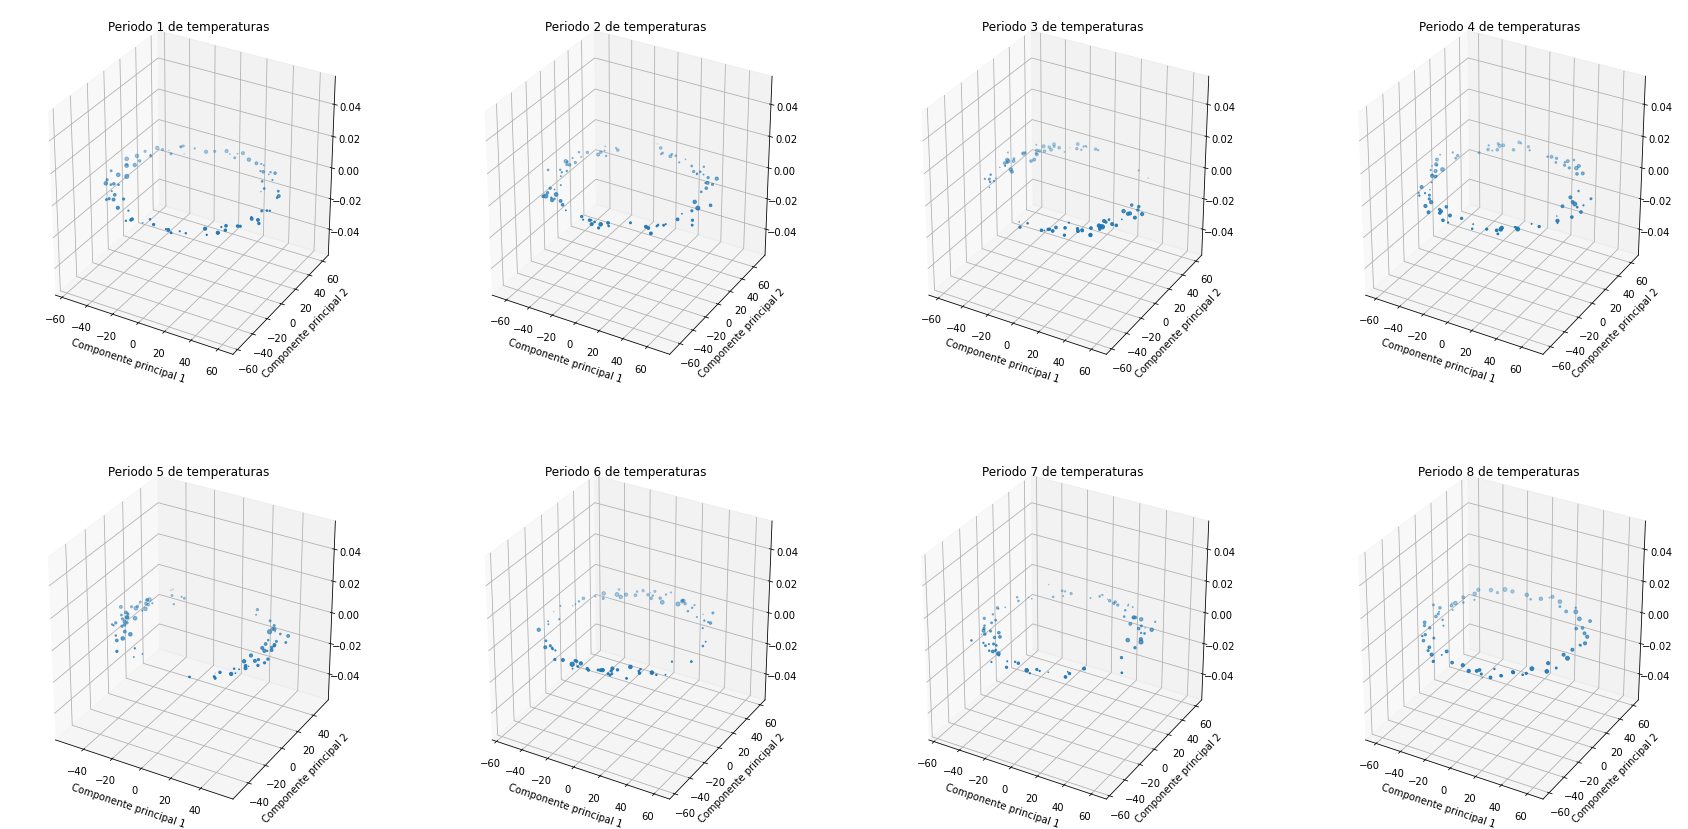

In [27]:
die3dPlotterZeug(temps3d,'temperaturas')

Respectivos maximos:
46.72074438743751 48.004484080852116 35.475277389164944
Respectivos maximos:
51.44629105951579 43.512572588487885 44.130689417756926
Respectivos maximos:
52.532082717208574 48.81052064751267 43.07882750262598
Respectivos maximos:
44.35485222431153 49.42365449553309 56.89220415332592
Respectivos maximos:
42.817952366557044 36.65232670998736 50.46839736536795
Respectivos maximos:
53.01422147451268 43.514068303934955 39.66351004302861
Respectivos maximos:
48.43901384949682 47.99455112656533 38.325943244969956
Respectivos maximos:
45.150255870091804 45.638762237889686 42.43194934875783


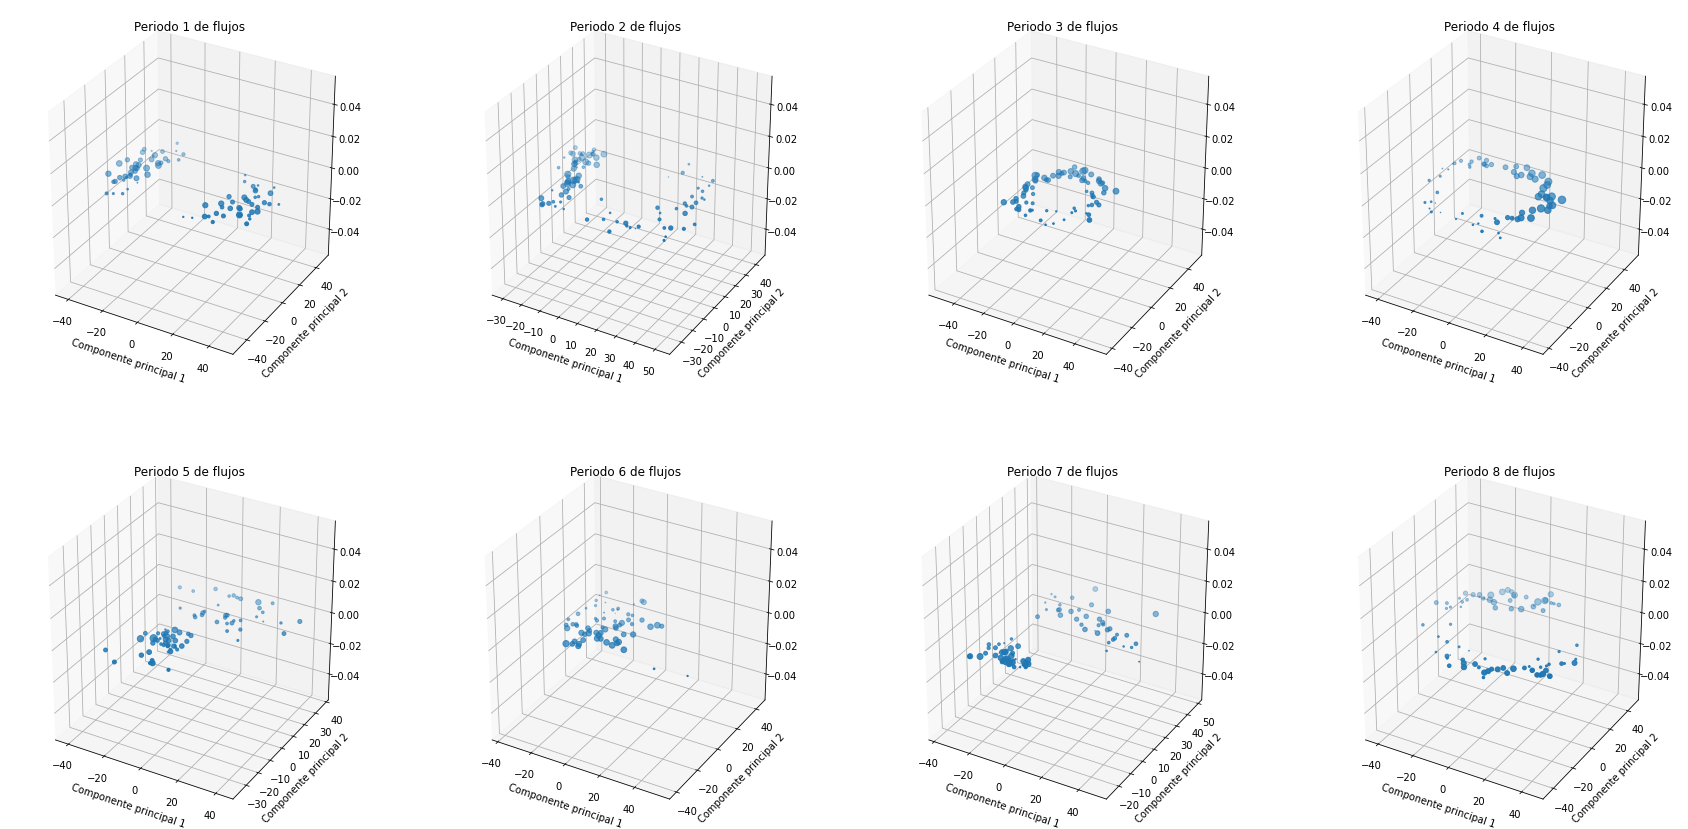

In [28]:
die3dPlotterZeug(flows3d,'flujos')

## TDA de rolling means

In [29]:
suavecito_suavecito=df_final
def roller(n):
  suavecito_suavecito[['rolling_flow_'+str(n),'rolling_temp_'+str(n),
                       'rolling_prec_'+str(n)]] =suavecito_suavecito[['flow',
                        'temperatures','precipitations']].rolling(n).mean()



In [30]:
n=30
roller(n)

In [31]:
periodsSoft=[]
for i in range(8):
  periodsSoft.append(suavecito_suavecito.iloc[int(i*21176/8)+1:int((i+1)*21176/8)])
suavecito_suavecito=suavecito_suavecito.dropna()

In [32]:
x1,y1,_ = fit_embedder(embedder_periodic, df_final['precipitations'])
x2,y2,_ = fit_embedder(embedder_periodic, df_final['temperatures'])
x3,y3,_ = fit_embedder(embedder_periodic, df_final['flow'].astype('float32'))


Shape of embedded time series: (2972, 15)
Optimal embedding dimension is 15 and time delay is 27
Shape of embedded time series: (2992, 9)
Optimal embedding dimension is 9 and time delay is 30
Shape of embedded time series: (2974, 13)
Optimal embedding dimension is 13 and time delay is 30


In [33]:
embedder_PrecsSoft = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=y1,
    dimension=x1,
    stride=stride,
)
embedder_TempsSoft = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=y2,
    dimension=x2,
    stride=stride,
)
embedder_FlowsSoft = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=y3,
    dimension=x3,
    stride=stride,
)

In [34]:
def tankv2(dfs: list) -> list:
  pca2 = PCA(n_components=2)
  pca3 = PCA(n_components=3)
  precs3d,precs2d,temps3d,temps2d,flows3d,flows2d=[],[],[],[],[],[]
  for i in range(len(dfs)):
    _,_,precipitacion_embedded = fit_embedder(embedder_PrecsSoft, dfs[i]['precipitations'],False)
    precs3d.append(pca3.fit_transform(precipitacion_embedded))
    precs2d.append(pca2.fit_transform(precipitacion_embedded))
    _,_,temperatures_embedded = fit_embedder(embedder_TempsSoft, dfs[i]['temperatures'],False)
    temps3d.append(pca3.fit_transform(temperatures_embedded))
    temps2d.append(pca2.fit_transform(temperatures_embedded))
    _,_,flow_embedded = fit_embedder(embedder_FlowsSoft, dfs[i]['flow'],False)
    flows3d.append(pca3.fit_transform(flow_embedded))
    flows2d.append(pca2.fit_transform(flow_embedded))
  return precs3d,precs2d,temps3d,temps2d,flows3d,flows2d


In [35]:
precs3d,precs2d,temps3d,temps2d,flows3d,flows2d=tankv2(periodsSoft)

### Encajes bidimensionales de datos suavizados

Respectivos maximos:
32.14938471221232 26.97437745018238
Respectivos maximos:
23.723306855307094 28.859845463422726
Respectivos maximos:
24.419461991752506 16.38529198110242
Respectivos maximos:
25.618847109794313 27.716721652942034
Respectivos maximos:
22.966611852731205 17.92732843370527
Respectivos maximos:
72.52280675961926 39.85194327204828
Respectivos maximos:
28.88867002931236 38.931335544242096
Respectivos maximos:
27.65495285690265 37.25357608810602


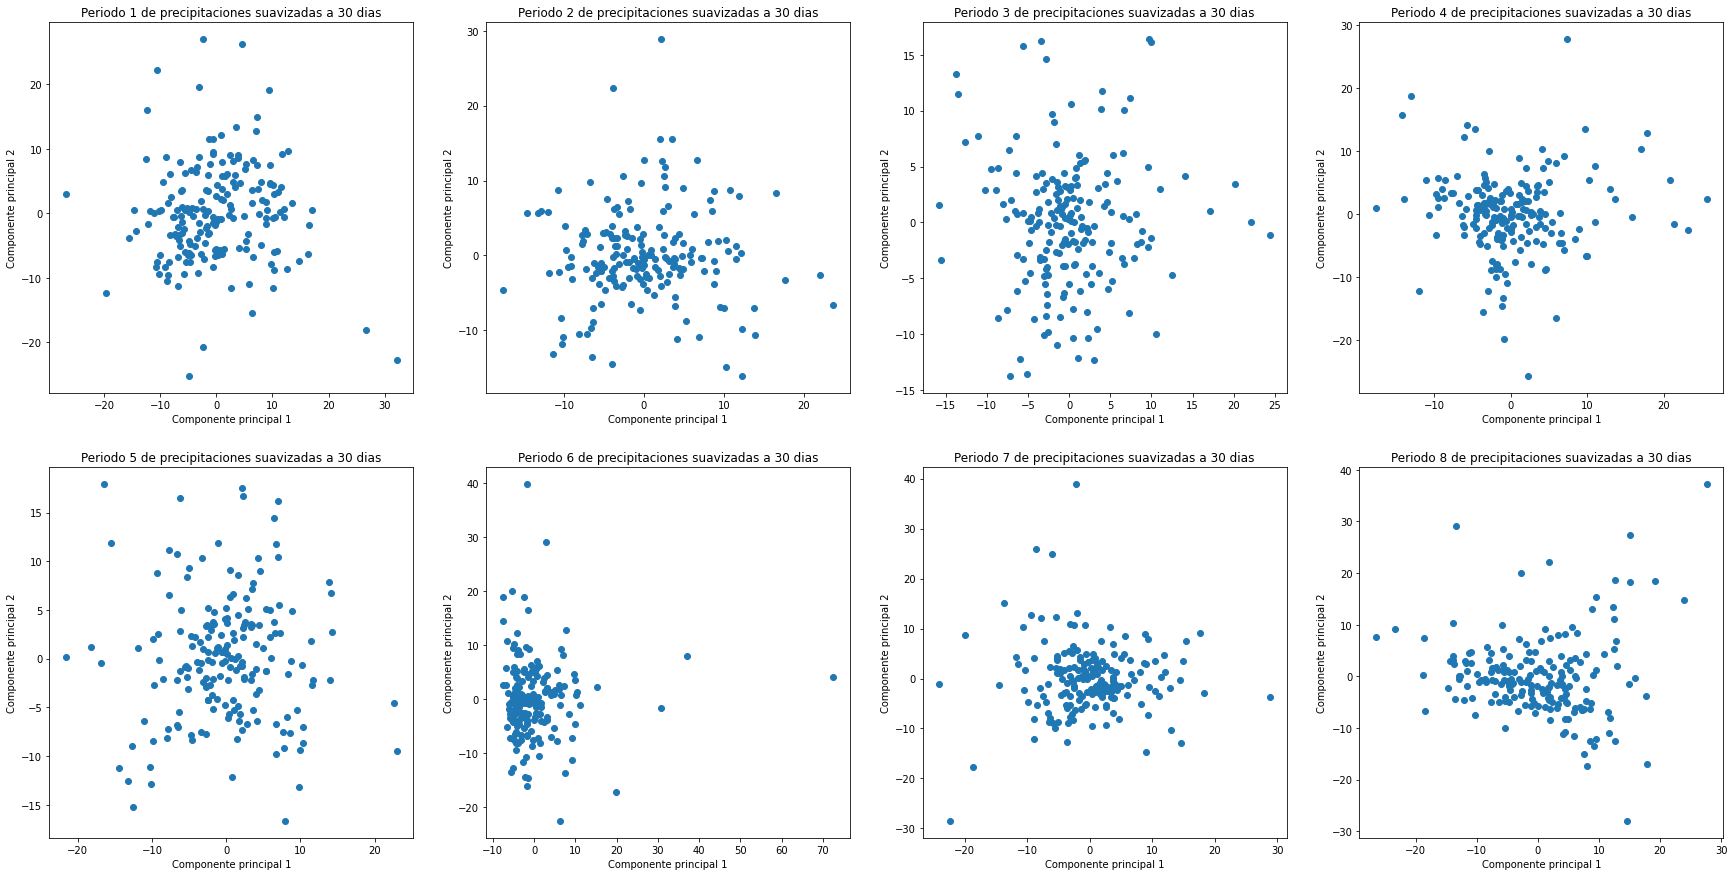

In [36]:
die2dPlotterZeug(precs2d,'precipitaciones suavizadas a '+str(n)+' dias')

Respectivos maximos:
62.42571728330229 60.33328746339148
Respectivos maximos:
68.79917337432065 69.84620883381614
Respectivos maximos:
62.41007841744732 60.31172468796334
Respectivos maximos:
67.69833532591295 62.7688455093971
Respectivos maximos:
53.48956921153393 52.13571375952584
Respectivos maximos:
62.74081320875355 58.68891397338455
Respectivos maximos:
62.43868573908604 60.500589922615
Respectivos maximos:
62.99387605345018 59.53878031643668


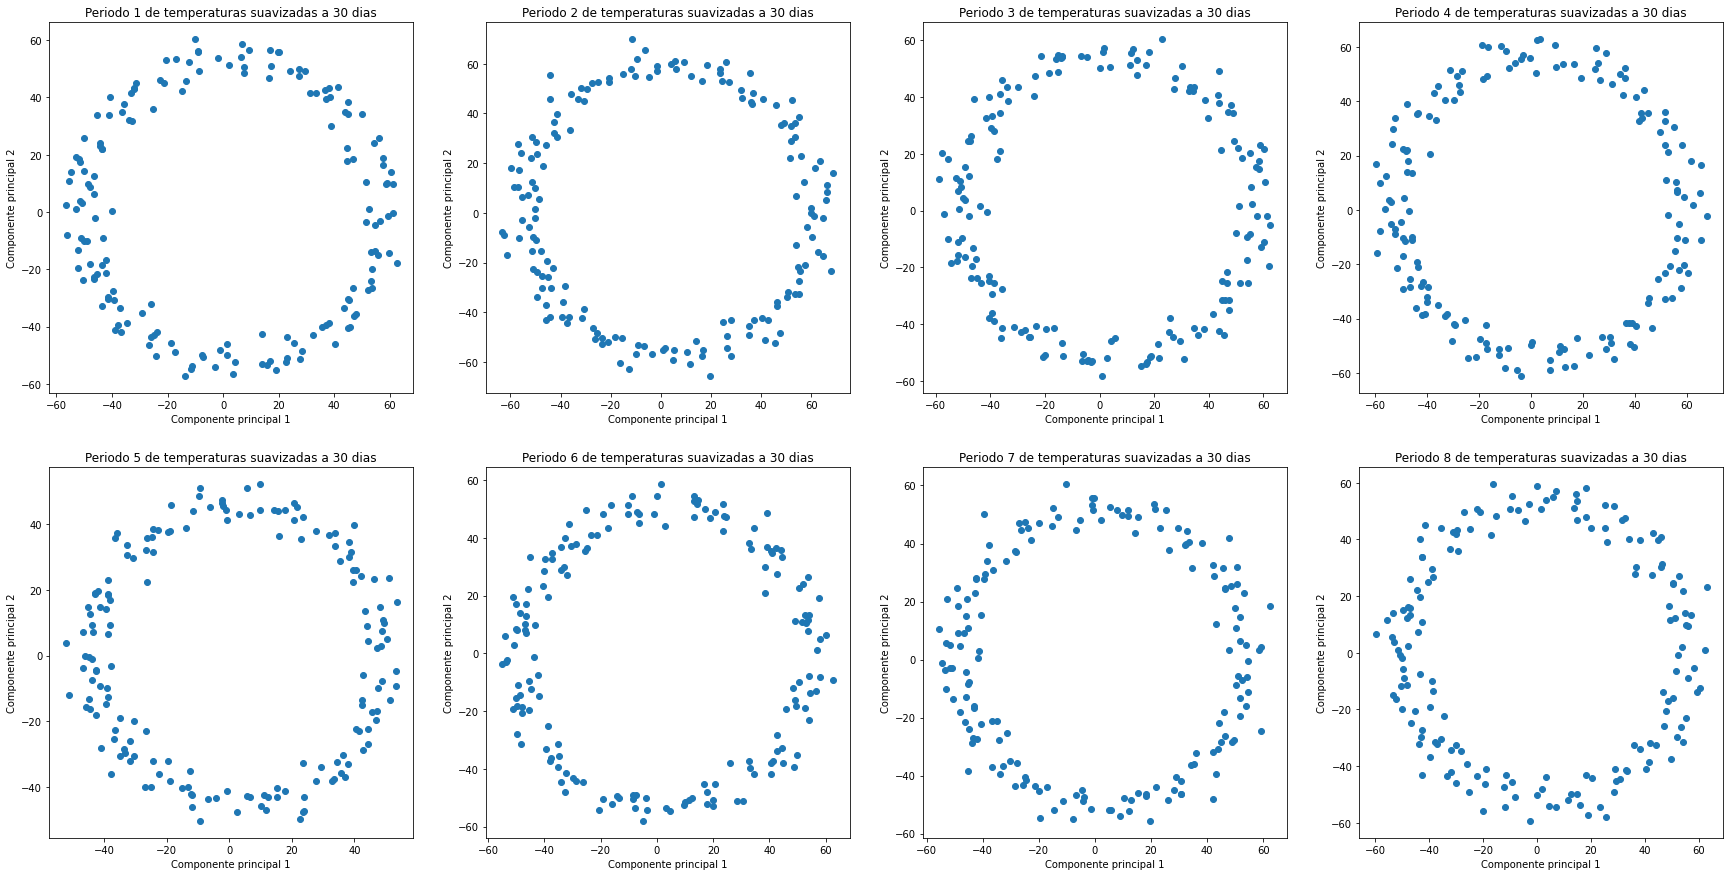

In [37]:
die2dPlotterZeug(temps2d,'temperaturas suavizadas a '+str(n)+' dias')

Respectivos maximos:
46.72074438743751 48.004484080852116
Respectivos maximos:
51.44629105951579 43.512572588487885
Respectivos maximos:
52.532082717208574 48.81052064751267
Respectivos maximos:
44.35485222431153 49.42365449553309
Respectivos maximos:
42.817952366557044 36.65232670998736
Respectivos maximos:
53.01422147451268 43.514068303934955
Respectivos maximos:
48.43901384949682 47.99455112656533
Respectivos maximos:
45.150255870091804 45.638762237889686


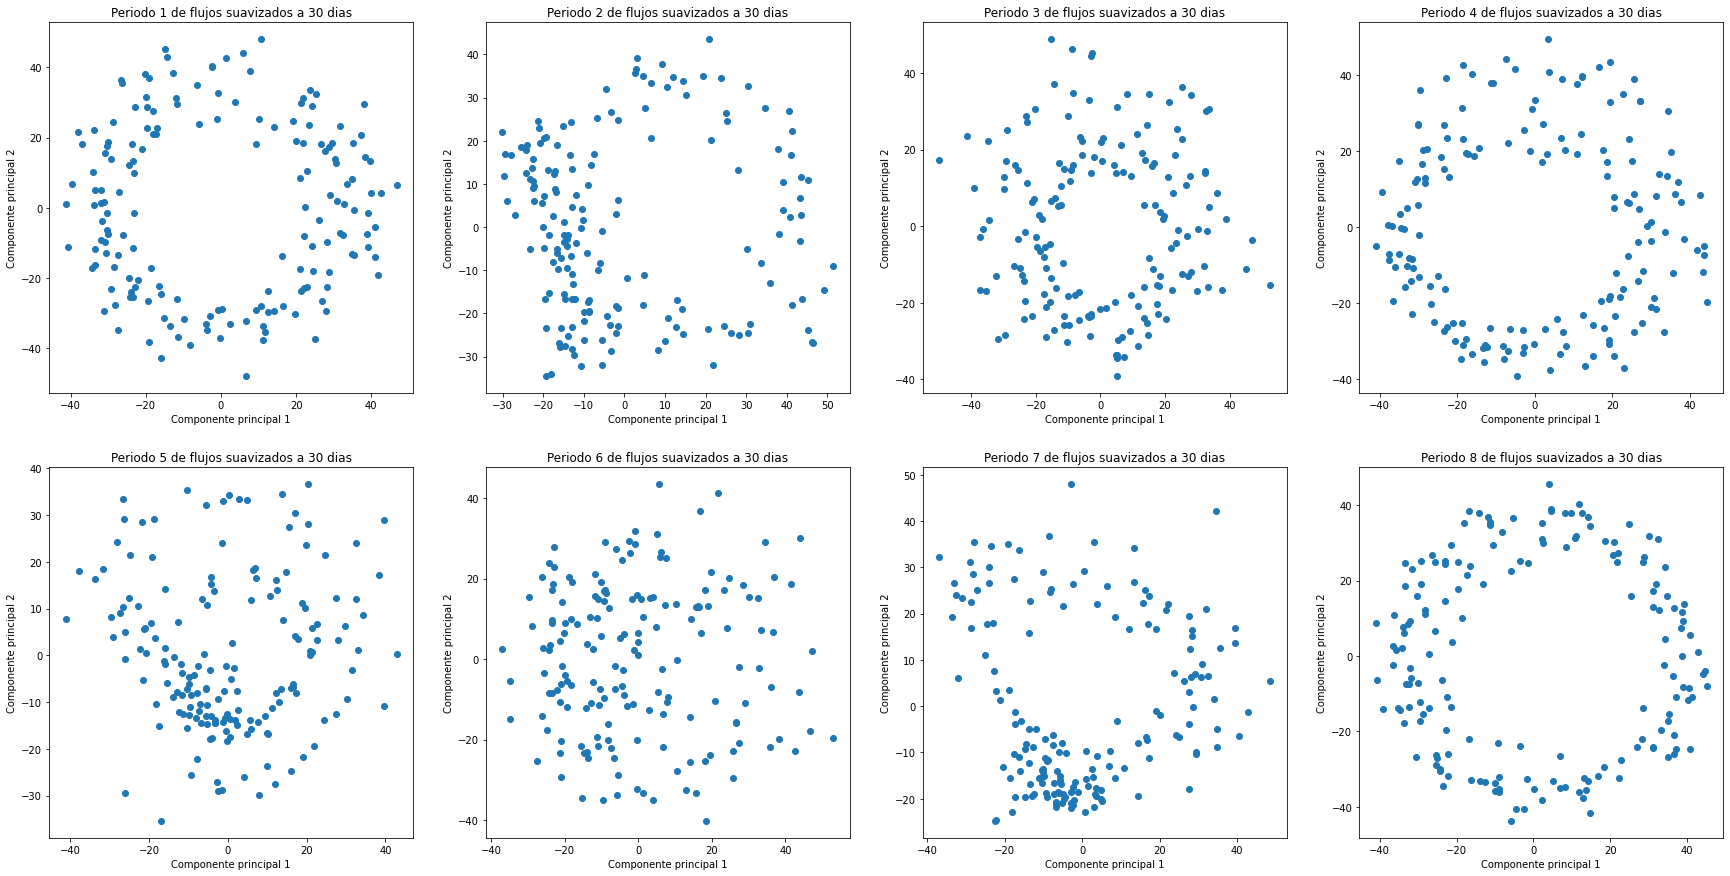

In [38]:
die2dPlotterZeug(flows2d,'flujos suavizados a '+str(n)+' dias')

### Encajes tridimensionales de datos suavizados

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Respectivos maximos:
32.14938471221232 26.97437745018238 32.751576452414895
Respectivos maximos:
23.723306855307094 28.859845463422726 21.767476458729252
Respectivos maximos:
24.419461991752506 16.38529198110242 29.380515600941603
Respectivos maximos:
25.618847109794313 27.716721652942034 24.05709880378769
Respectivos maximos:
22.966611852731205 17.92732843370527 33.43317138323384
Respectivos maximos:
72.52280675961926 39.85194327204828 30.097099954788444
Respectivos maximos:
28.88867002931236 38.931335544242096 24.634045114304442
Respectivos maximos:
27.65495285690265 37.25357608810602 29.59493562945363


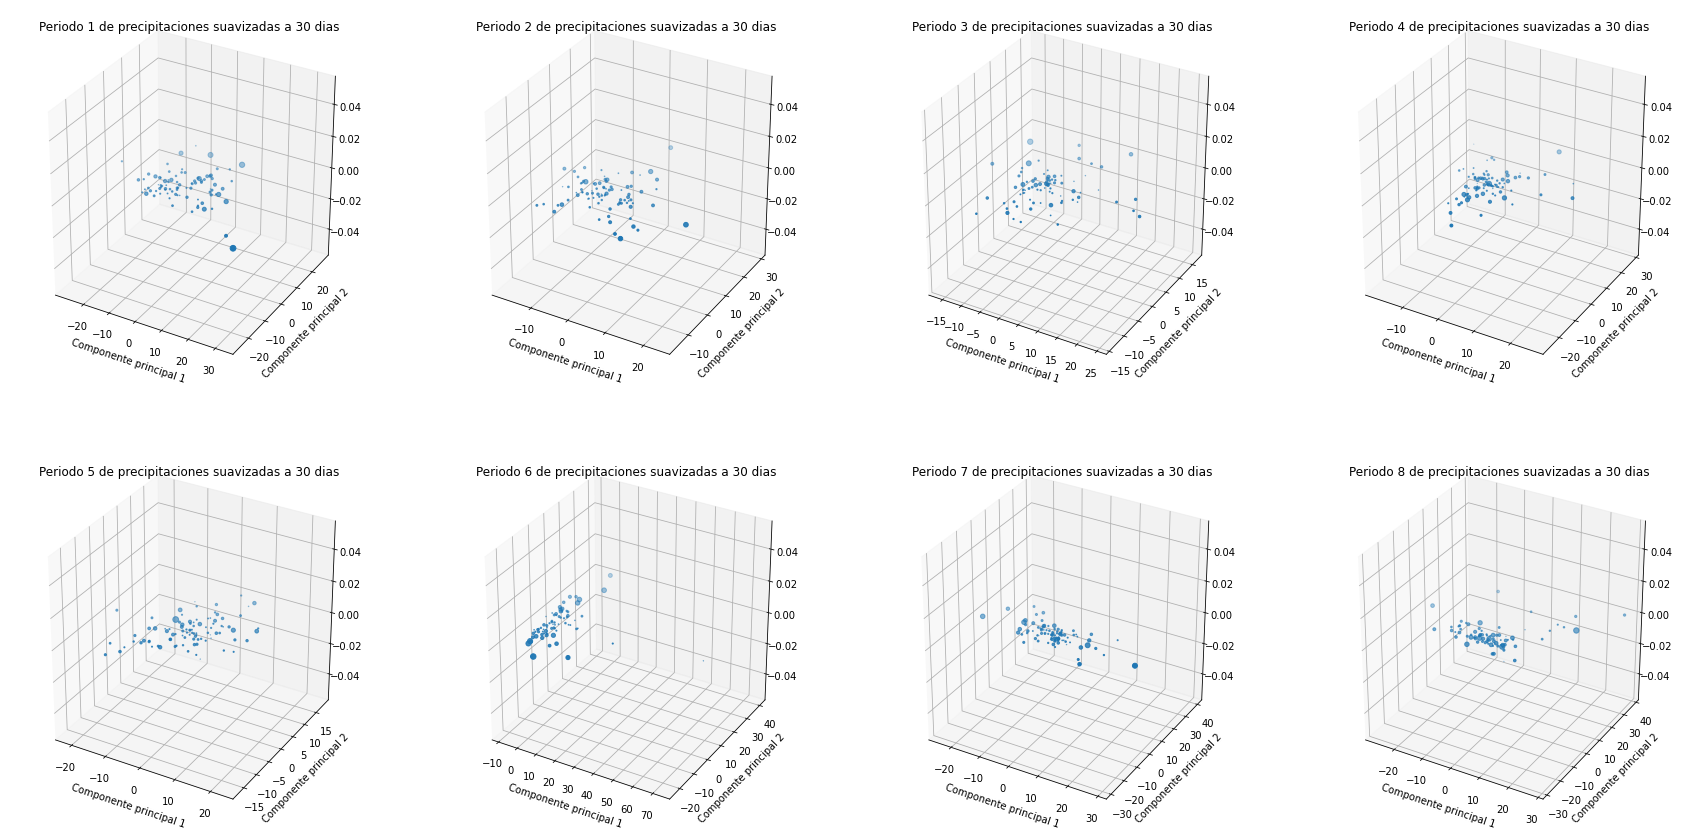

In [39]:
die3dPlotterZeug(precs3d,'precipitaciones suavizadas a '+str(n)+' dias')

Respectivos maximos:
62.42571728330229 60.33328746339148 17.004521311485842
Respectivos maximos:
68.79917337432065 69.84620883381614 17.353051221745783
Respectivos maximos:
62.41007841744732 60.31172468796334 17.0319741639685
Respectivos maximos:
67.69833532591295 62.7688455093971 15.036395918506551
Respectivos maximos:
53.48956921153393 52.13571375952584 17.609962820051976
Respectivos maximos:
62.74081320875355 58.68891397338455 18.237796196700657
Respectivos maximos:
62.43868573908604 60.500589922615 17.166466319672445
Respectivos maximos:
62.99387605345018 59.53878031643668 15.997522579515362


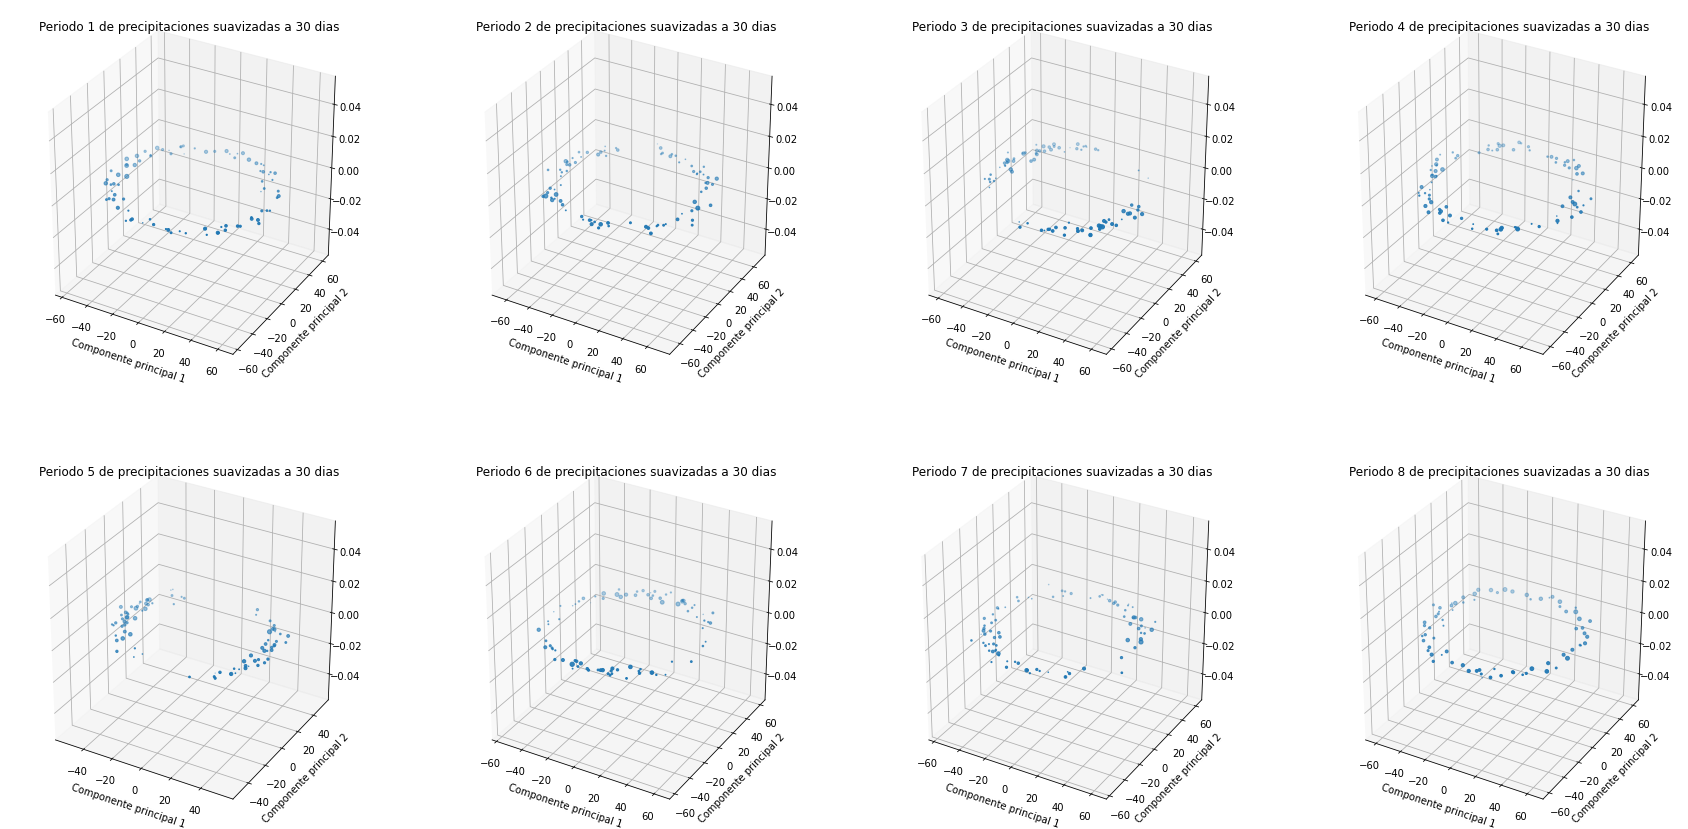

In [40]:
die3dPlotterZeug(temps3d,'precipitaciones suavizadas a '+str(n)+' dias')

Respectivos maximos:
46.72074438743751 48.004484080852116 35.475277389164944
Respectivos maximos:
51.44629105951579 43.512572588487885 44.130689417756926
Respectivos maximos:
52.532082717208574 48.81052064751267 43.07882750262598
Respectivos maximos:
44.35485222431153 49.42365449553309 56.89220415332592
Respectivos maximos:
42.817952366557044 36.65232670998736 50.46839736536795
Respectivos maximos:
53.01422147451268 43.514068303934955 39.66351004302861
Respectivos maximos:
48.43901384949682 47.99455112656533 38.325943244969956
Respectivos maximos:
45.150255870091804 45.638762237889686 42.43194934875783


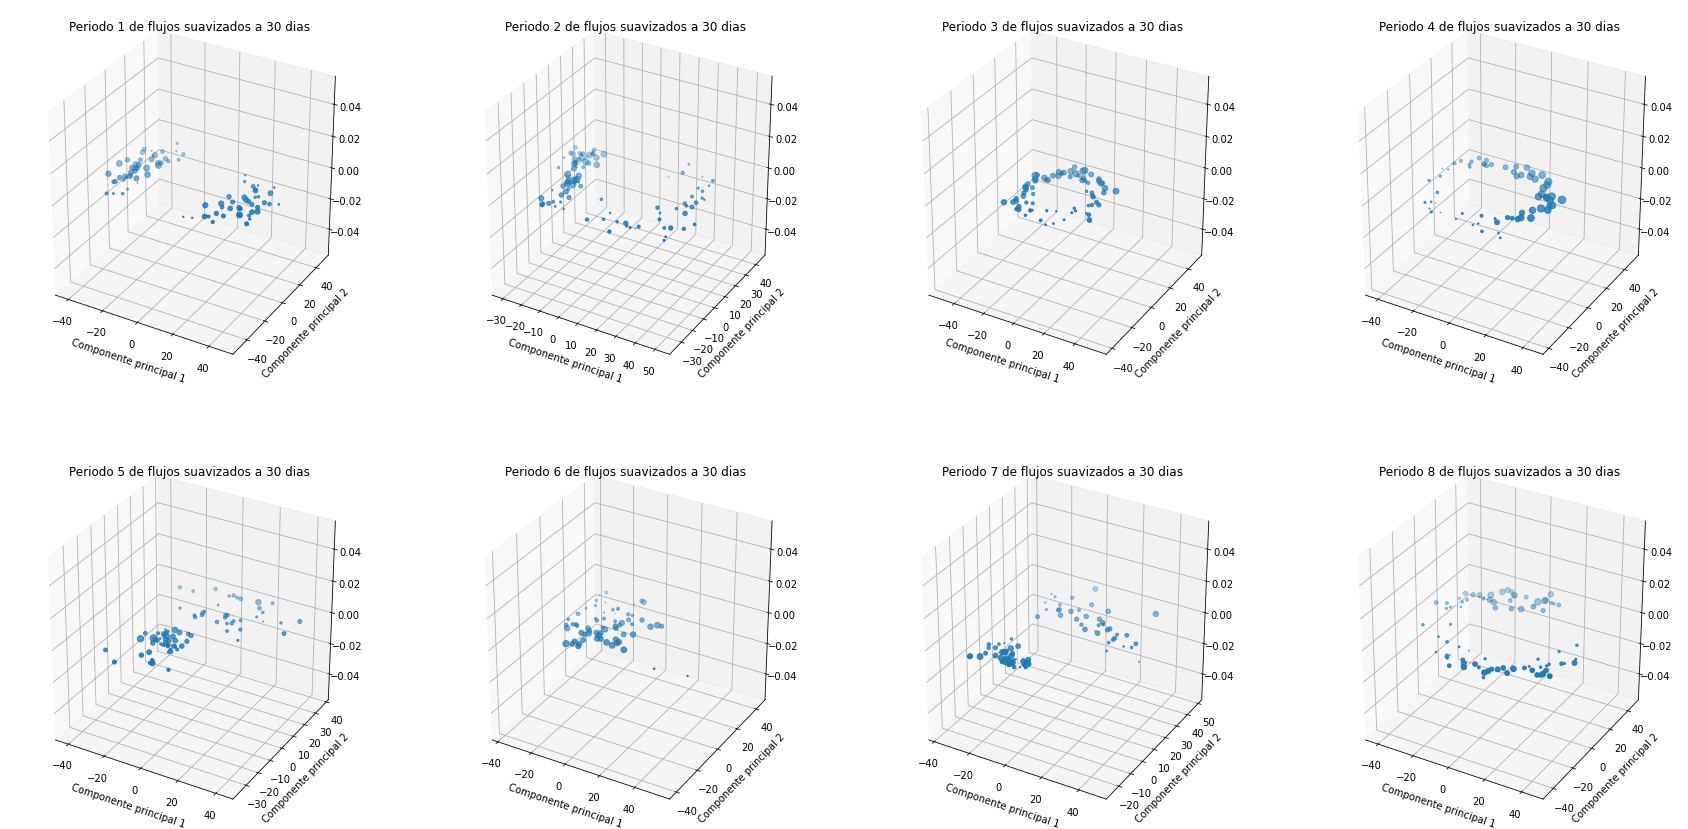

In [41]:
die3dPlotterZeug(flows3d,'flujos suavizados a '+str(n)+' dias')